<center>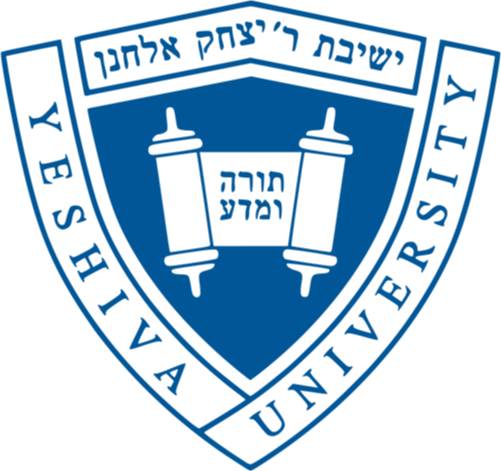</center>

# <center>Katz School of Science and Health</center>
# <center>AIM 5003 Numerical Methods</center>
<br>

# <center> Homework #2 </center>
# <center>Least Squares</center>
<br>
<center>Due date: 11/09/2022</center>
<br>


### <center> Radek Jan Holik </center>
<center> October 31, 2022 </center>

A correct answer without proper explanation will not receive full credit.

In [92]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

import warnings
warnings.filterwarnings("ignore")

In [93]:
def LSNorEq(A, b, pr = False):
    """
        Function declaration for calculating least squares
    """
     
    # AᵀA
    aTransA = np.dot(A.T, A)
    
    # Aᵀb
    aTransb = np.dot(A.T, b)

    # x̄ 
    xBar = np.linalg.solve(aTransA, aTransb)
    
    # Residuum r = b - A * x̄
    r = np.round(b - A @ xBar, 12)

    # 2-Norm Error ║r║₂
    twoNormError = np.linalg.norm(r, 2)
    
    # RMSE
    rmse = twoNormError / np.sqrt(len(r))
    
    if pr == True:
        print(f"\nAᵀA =\n {aTransA}")
        print(f"\nAᵀb =\n {aTransb}")
        print("\nThe Normal Quations:")
        print(f"AᵀA x̄ = Aᵀb")
        print(f"\nx̄ =\n {np.round(xBar, 6)}")
        print(f"\nr =\n{np.round(r, 3)}")
        print(f"\n║r║₂ = {np.round(twoNormError, 3)}")
        print(f"\nRMSE = {np.round(rmse, 6)}")
    else:
        return [aTransA, aTransb, xBar, r, twoNormError, rmse]

# 4.1 Least Squares and the Normal Equations

## Exercise 2
Find the least squares solutions and RMSE of the following systems:

### (a)
$\begin{bmatrix} 1 & 1 & 0\\ 0 & 1 & 1\\ 1 & 2 & 1\\ 1 & 0 & 1 \end{bmatrix}\begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix}= \begin{bmatrix} 2\\ 2\\ 3\\ 4 \end{bmatrix}$

In [94]:
# Declaration of A and b
A = np.array([[1, 1, 0],[0, 1, 1],[1, 2, 1],[1, 0, 1]])
b = np.array([[2], [2], [3], [4]])
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1 1 0]
 [0 1 1]
 [1 2 1]
 [1 0 1]]

b =
 [[2]
 [2]
 [3]
 [4]]


### Solution

In [95]:
LSNorEq(A, b, True)


AᵀA =
 [[3 3 2]
 [3 6 3]
 [2 3 3]]

Aᵀb =
 [[ 9]
 [10]
 [ 9]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 2.      ]
 [-0.333333]
 [ 2.      ]]

r =
[[ 0.333]
 [ 0.333]
 [-0.333]
 [ 0.   ]]

║r║₂ = 0.577

RMSE = 0.288675


### (b)
##### $\begin{bmatrix} 1 & 0 & 1\\ 1 & 0 & 2\\ 1 & 1 & 1\\ 2 & 1 & 1 \end{bmatrix}\begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix}= \begin{bmatrix} 2\\ 3\\ 1\\ 2 \end{bmatrix}$

In [96]:
# Declaration of A and b
A = np.array([[1, 0, 1],[1, 0, 2],[1, 1, 1],[2, 1, 1]])
b = np.array([[2], [3], [1], [2]])
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1 0 1]
 [1 0 2]
 [1 1 1]
 [2 1 1]]

b =
 [[2]
 [3]
 [1]
 [2]]


### Solution

In [97]:
LSNorEq(A, b, True)


AᵀA =
 [[7 3 6]
 [3 2 2]
 [6 2 7]]

Aᵀb =
 [[10]
 [ 3]
 [11]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 1.]
 [-1.]
 [ 1.]]

r =
[[0.]
 [0.]
 [0.]
 [0.]]

║r║₂ = 0.0

RMSE = 0.0


## Exercise 8
Find the best line through each set of data points, and find the RMSE:

#### (a)
$(0,0), (1,3), (2,3), (5,6)$

In [98]:
data = [(0, 0), (1, 3), (2, 3), (5, 6)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

# Matrix A fro model y = c₁ + c₂ * t
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1),x0.reshape(len(x0),1)),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 5.]]

b =
 [[0.]
 [3.]
 [3.]
 [6.]]


### Solution

In [99]:
LSNorEq(A, b, True)


AᵀA =
 [[ 4.  8.]
 [ 8. 30.]]

Aᵀb =
 [[12.]
 [39.]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[0.857143]
 [1.071429]]

r =
[[-0.857]
 [ 1.071]
 [-0.   ]
 [-0.214]]

║r║₂ = 1.389

RMSE = 0.694365


### <center>$y = 0.857 + 1.071 t  $</center>

#### (b)
$(1,2), (3,2), (4,1), (6,3)$

In [100]:
data = [(1, 2), (3, 2), (4, 1), (6, 3)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

# Matrix A fro model y = c₁ + c₂ * t
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1),x0.reshape(len(x0),1)),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1. 1.]
 [1. 3.]
 [1. 4.]
 [1. 6.]]

b =
 [[2.]
 [2.]
 [1.]
 [3.]]


### Solution

In [101]:
LSNorEq(A, b, True)


AᵀA =
 [[ 4. 14.]
 [14. 62.]]

Aᵀb =
 [[ 8.]
 [30.]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[1.461538]
 [0.153846]]

r =
[[ 0.385]
 [ 0.077]
 [-1.077]
 [ 0.615]]

║r║₂ = 1.301

RMSE = 0.650444


### <center>$y = 1.462 + 0.154 t  $</center>

#### (c)
$(0,5), (1,3), (2,3), (3,1)$

In [102]:
data = [(0, 5), (1, 3), (2, 3), (3, 1)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

# Matrix A fro model y = c₁ + c₂ * t
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1),x0.reshape(len(x0),1)),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]]

b =
 [[5.]
 [3.]
 [3.]
 [1.]]


### Solution

In [103]:
LSNorEq(A, b, True)


AᵀA =
 [[ 4.  6.]
 [ 6. 14.]]

Aᵀb =
 [[12.]
 [12.]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 4.8]
 [-1.2]]

r =
[[ 0.2]
 [-0.6]
 [ 0.6]
 [-0.2]]

║r║₂ = 0.894

RMSE = 0.447214


### <center>$y = 4.8 -1.2 t  $</center>

## Exercise 9
Find the best parabola through each data point set in Exercise 8, and compare the RMSE
with the best-line fit.

### (a)

In [104]:
data = [(0, 0), (1, 3), (2, 3), (5, 6)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

# Matrix A fro model y = c₁ + c₂ * t + c₃ * t²
A = np.concatenate(( np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1), x0.reshape(len(x0),1)**2),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  5. 25.]]

b =
 [[0.]
 [3.]
 [3.]
 [6.]]


### Solution

In [105]:
LSNorEq(A, b, True)


AᵀA =
 [[  4.   8.  30.]
 [  8.  30. 134.]
 [ 30. 134. 642.]]

Aᵀb =
 [[ 12.]
 [ 39.]
 [165.]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 0.348066]
 [ 1.947514]
 [-0.165746]]

r =
[[-0.348]
 [ 0.87 ]
 [-0.58 ]
 [ 0.058]]

║r║₂ = 1.104

RMSE = 0.551868


### <center>$y = 0.348 + 1.948 t - 0.166 t^2$</center>

### (b)

In [106]:
data = [(1, 2), (3, 2), (4, 1), (6, 3)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

# Matrix A fro model y = c₁ + c₂ * t + c₃ * t²
A = np.concatenate(( np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1), x0.reshape(len(x0),1)**2),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[ 1.  1.  1.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  6. 36.]]

b =
 [[2.]
 [2.]
 [1.]
 [3.]]


### Solution

In [107]:
LSNorEq(A, b, True)


AᵀA =
 [[   4.   14.   62.]
 [  14.   62.  308.]
 [  62.  308. 1634.]]

Aᵀb =
 [[  8.]
 [ 30.]
 [144.]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 2.961538]
 [-1.012821]
 [ 0.166667]]

r =
[[-0.115]
 [ 0.577]
 [-0.577]
 [ 0.115]]

║r║₂ = 0.832

RMSE = 0.416025


### <center>$y = 2.962 - 1.013 t + 0.167 t^2$</center>

### (c)

In [108]:
data = [(0, 5), (1, 3), (2, 3), (3, 1)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

# Matrix A fro model y = c₁ + c₂ * t + c₃ * t²
A = np.concatenate(( np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1), x0.reshape(len(x0),1)**2),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]

b =
 [[5.]
 [3.]
 [3.]
 [1.]]


### Solution

In [109]:
LSNorEq(A, b, True)


AᵀA =
 [[ 4.  6. 14.]
 [ 6. 14. 36.]
 [14. 36. 98.]]

Aᵀb =
 [[12.]
 [12.]
 [24.]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 4.8]
 [-1.2]
 [-0. ]]

r =
[[ 0.2]
 [-0.6]
 [ 0.6]
 [-0.2]]

║r║₂ = 0.894

RMSE = 0.447214


### <center>$y = 4.8 - 1.2 t + 0 t^2$</center>

## Computer problem 1
Form the normal equations, and compute the least squares solution and 2-norm error for
the following inconsistent systems:

### (a)
##### $\begin{bmatrix} 3 & -1 & 2\\ 4 & 1 & 0\\ -3 & 2 & 1\\ 1 & 1 & 5 \\ -2 & 0 & 3 \end{bmatrix}\begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix}= \begin{bmatrix} 10\\ 10\\ -5\\ 15 \\ 0 \end{bmatrix}$

In [110]:
# Declaration of A and b
A = np.array([[3, -1, 2],[4, 1, 0], [-3, 2, 1], [1, 1, 5], [-2, 0, 3]])
b = np.array([[10],[10], [-5],[15],[0]])
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[ 3 -1  2]
 [ 4  1  0]
 [-3  2  1]
 [ 1  1  5]
 [-2  0  3]]

b =
 [[10]
 [10]
 [-5]
 [15]
 [ 0]]


### Solution

In [111]:
LSNorEq(A, b, True)


AᵀA =
 [[39 -4  2]
 [-4  7  5]
 [ 2  5 39]]

Aᵀb =
 [[100]
 [  5]
 [ 90]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[2.524609]
 [0.661633]
 [2.0934  ]]

r =
[[-1.099]
 [-0.76 ]
 [-0.843]
 [ 1.347]
 [-1.231]]

║r║₂ = 2.413

RMSE = 1.079346


### (b)
#####  $\begin{bmatrix} 4 & 2 & 3 & 0\\ -2 & 3 & -1 & 1\\ 1 & 3 & -4 & 2\\ 1 & 0 & 1 & -1 \\ 3 & 1 & 3 & -2 \end{bmatrix}\begin{bmatrix} x_1\\ x_2\\ x_3 \\ x_4 \end{bmatrix}= \begin{bmatrix} 10\\ 0\\ 2\\ 0 \\ 5 \end{bmatrix}$

In [112]:
# Declaration of A and b
A = np.array([[4, 2, 3, 0], [-2, 3, -1, 1], [1, 3, -4, 2], [1, 0, 1, -1], [3, 1, 3, -2]])
b = np.array([[10],[0], [2],[0],[5]])
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[ 4  2  3  0]
 [-2  3 -1  1]
 [ 1  3 -4  2]
 [ 1  0  1 -1]
 [ 3  1  3 -2]]

b =
 [[10]
 [ 0]
 [ 2]
 [ 0]
 [ 5]]


### Solution

In [113]:
LSNorEq(A, b, True)


AᵀA =
 [[ 31   8  20  -7]
 [  8  23  -6   7]
 [ 20  -6  36 -16]
 [ -7   7 -16  10]]

Aᵀb =
 [[57]
 [31]
 [37]
 [-6]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[1.273896]
 [0.688509]
 [1.212449]
 [1.74969 ]]

r =
[[-0.11 ]
 [-0.055]
 [ 0.011]
 [-0.737]
 [ 0.352]]

║r║₂ = 0.826

RMSE = 0.369237


## Computer problem 2
Consider the world oil production data of Computer Problem 3.2.3. Find the best least squares

|year|bbl/day (×$10^6$)|
|:--:|:--:|
|1994|67.052|
|1995|68.008|
|1996|69.803|
|1997|72.024|
|1998|73.400|
|1999|72.063|
|2000|74.669|
|2001|74.487|
|2002|74.065|
|2003|76.777|

In [114]:
data = [(1994,67.052), (1995,68.008), (1996,69.803), (1997,72.024), (1998,73.400), (1999,72.063), (2000,74.669), (2001,74.487),(2002,74.065),(2003,76.777)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

### (a) line,

### The Model $y = c_1 + c_2 t$

In [115]:
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1),x0.reshape(len(x0),1)),axis=1)
ALin = A
b = y0.reshape(len(y0),1)

print(f"A = \n{A}")
print(f"\nb = \n{b}")

A = 
[[1.000e+00 1.994e+03]
 [1.000e+00 1.995e+03]
 [1.000e+00 1.996e+03]
 [1.000e+00 1.997e+03]
 [1.000e+00 1.998e+03]
 [1.000e+00 1.999e+03]
 [1.000e+00 2.000e+03]
 [1.000e+00 2.001e+03]
 [1.000e+00 2.002e+03]
 [1.000e+00 2.003e+03]]

b = 
[[67.052]
 [68.008]
 [69.803]
 [72.024]
 [73.4  ]
 [72.063]
 [74.669]
 [74.487]
 [74.065]
 [76.777]]


### Solution

In [116]:
LSNorEq(A, b, True)


AᵀA =
 [[1.0000000e+01 1.9985000e+04]
 [1.9985000e+04 3.9940105e+07]]

Aᵀb =
 [[7.22348000e+02]
 [1.44369245e+06]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[-1.86500209e+03]
 [ 9.69345000e-01]]

r =
[[-0.821]
 [-0.834]
 [-0.008]
 [ 1.243]
 [ 1.65 ]
 [-0.656]
 [ 0.98 ]
 [-0.171]
 [-1.563]
 [ 0.18 ]]

║r║₂ = 3.087

RMSE = 0.976318


### <center>$y = -1.865002 \cdot 10^{3} + 9.69345 \cdot 10^{-1} t$</center>

### Plot

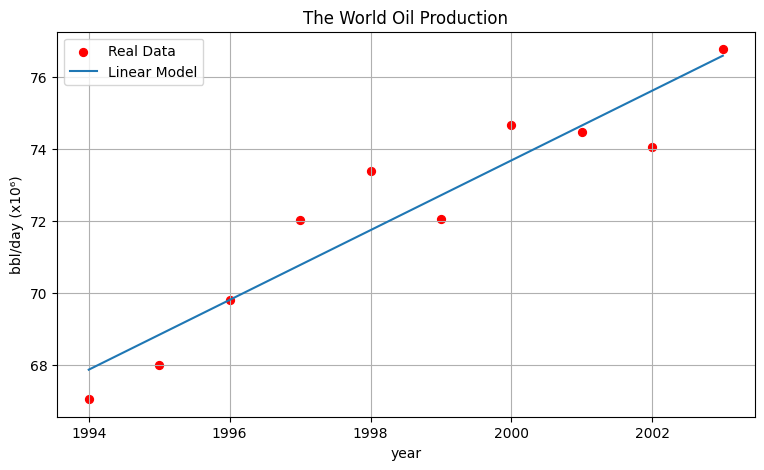

In [117]:
t = np.linspace(1994, 2003, num=1000)
y = []

# Obtaining data for a polynomial of the 1st order
xBarLin = LSNorEq(A, b)[2]
for i in range(len(t)):
    value = float(np.dot(np.array([[1, t[i]]]), xBarLin))
    y.append(value)

# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(t, y)
plt.title('The World Oil Production')
plt.legend(["Real Data","Linear Model"])
plt.xlabel('year')
plt.ylabel('bbl/day (x10⁶)')
plt.grid()
plt.show()

### (b) parabola, and

### The Model $y = c_1 + c_2 t + c_3 t^2$

In [118]:
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1) , x0.reshape(len(x0),1)**2 ),axis=1)
AQua = A
b = y0.reshape(len(y0),1)

print(f"A = \n{A}")
print(f"\nb = \n{b}")

A = 
[[1.000000e+00 1.994000e+03 3.976036e+06]
 [1.000000e+00 1.995000e+03 3.980025e+06]
 [1.000000e+00 1.996000e+03 3.984016e+06]
 [1.000000e+00 1.997000e+03 3.988009e+06]
 [1.000000e+00 1.998000e+03 3.992004e+06]
 [1.000000e+00 1.999000e+03 3.996001e+06]
 [1.000000e+00 2.000000e+03 4.000000e+06]
 [1.000000e+00 2.001000e+03 4.004001e+06]
 [1.000000e+00 2.002000e+03 4.008004e+06]
 [1.000000e+00 2.003000e+03 4.012009e+06]]

b = 
[[67.052]
 [68.008]
 [69.803]
 [72.024]
 [73.4  ]
 [72.063]
 [74.669]
 [74.487]
 [74.065]
 [76.777]]


### Solution

In [119]:
LSNorEq(A, b, True)


AᵀA =
 [[1.00000000e+01 1.99850000e+04 3.99401050e+07]
 [1.99850000e+04 3.99401050e+07 7.98206296e+10]
 [3.99401050e+07 7.98206296e+10 1.59522517e+14]]

Aᵀb =
 [[7.22348000e+02]
 [1.44369245e+06]
 [2.88538510e+09]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[-2.90813121e+05]
 [ 2.90134935e+02]
 [-7.23460000e-02]]

r =
[[ 0.047]
 [-0.545]
 [-0.153]
 [ 0.809]
 [ 1.071]
 [-1.235]
 [ 0.546]
 [-0.316]
 [-1.273]
 [ 1.048]]

║r║₂ = 2.602

RMSE = 0.822677


### <center>$y = -2.90813121 \cdot 10^{5} + 2.90135 \cdot 10^{2} t - 7.2346 \cdot 10^{-2} t^2$</center>

### Plot

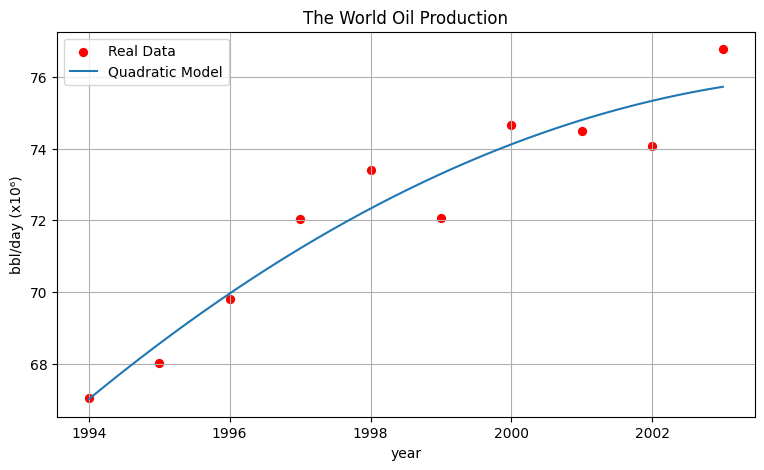

In [120]:
t = np.linspace(1994, 2003, num=1000)
y = []

# Obtaining data for a polynomial of the 2nd order
xBarQua = LSNorEq(A, b)[2]
for i in range(len(t)):
    value = float(np.dot(np.array([[1, t[i], t[i]**2]]), xBarQua))
    y.append(value)

# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(t, y)
plt.title('The World Oil Production')
plt.legend(["Real Data","Quadratic Model"])
plt.xlabel('year')
plt.ylabel('bbl/day (x10⁶)')
plt.grid()
plt.show()

### (c) cubic curve through the 10 data points and the RMSE of the fits. Use each to estimate the 2010 production level. Which fit best represents the data in terms of RMSE?

#### The Cubic Model $y = c_1 + c_2 t + c_3 t^2 + c_4 t^3$

In [121]:
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1) , x0.reshape(len(x0),1)**2, x0.reshape(len(x0),1)**3 ),axis=1)
ACub = A
b = y0.reshape(len(y0),1)

print(f"A = \n{A}")
print(f"\nb = \n{b}")

A = 
[[1.00000000e+00 1.99400000e+03 3.97603600e+06 7.92821578e+09]
 [1.00000000e+00 1.99500000e+03 3.98002500e+06 7.94014988e+09]
 [1.00000000e+00 1.99600000e+03 3.98401600e+06 7.95209594e+09]
 [1.00000000e+00 1.99700000e+03 3.98800900e+06 7.96405397e+09]
 [1.00000000e+00 1.99800000e+03 3.99200400e+06 7.97602399e+09]
 [1.00000000e+00 1.99900000e+03 3.99600100e+06 7.98800600e+09]
 [1.00000000e+00 2.00000000e+03 4.00000000e+06 8.00000000e+09]
 [1.00000000e+00 2.00100000e+03 4.00400100e+06 8.01200600e+09]
 [1.00000000e+00 2.00200000e+03 4.00800400e+06 8.02402401e+09]
 [1.00000000e+00 2.00300000e+03 4.01200900e+06 8.03605403e+09]]

b = 
[[67.052]
 [68.008]
 [69.803]
 [72.024]
 [73.4  ]
 [72.063]
 [74.669]
 [74.487]
 [74.065]
 [76.777]]


### Solution

In [122]:
LSNorEq(A, b, True)


AᵀA =
 [[1.00000000e+01 1.99850000e+04 3.99401050e+07 7.98206296e+10]
 [1.99850000e+04 3.99401050e+07 7.98206296e+10 1.59522517e+14]
 [3.99401050e+07 7.98206296e+10 1.59522517e+14 3.18808384e+17]
 [7.98206296e+10 1.59522517e+14 3.18808384e+17 6.37145135e+20]]

Aᵀb =
 [[7.22348000e+02]
 [1.44369245e+06]
 [2.88538510e+09]
 [5.76678520e+12]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[-4.62496323e+05]
 [ 5.47896429e+02]
 [-2.01345000e-01]
 [ 2.20000000e-05]]

r =
[[ 0.048]
 [-0.545]
 [-0.154]
 [ 0.809]
 [ 1.071]
 [-1.235]
 [ 0.547]
 [-0.315]
 [-1.273]
 [ 1.047]]

║r║₂ = 2.601

RMSE = 0.82253


#### <center>$y = -4.62496323 \cdot 10^{5} + 5.47896 \cdot 10^{2} t - 2.01345 \cdot 10^{-1} t^2 + 2.2 \cdot 10^{-5} t^3$</center>

### Plot

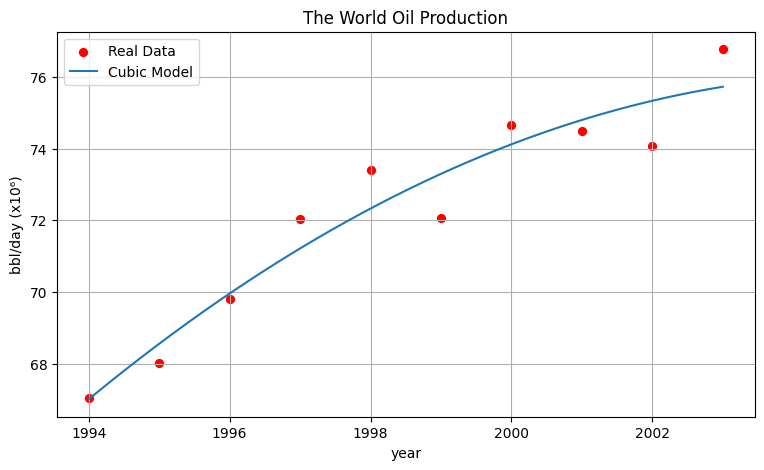

In [123]:
t = np.linspace(1994, 2003, num=1000)
y = []

# Obtaining data for a polynomial of the 3rd order
xBarCub = LSNorEq(A, b)[2]
for i in range(len(t)):
    value = float(np.dot(np.array([[1, t[i], t[i]**2, t[i]**3]]), xBarCub))
    y.append(value)

# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(t, y)
plt.title('The World Oil Production')
plt.legend(["Real Data","Cubic Model"])
plt.xlabel('year')
plt.ylabel('bbl/day (x10⁶)')
plt.grid()
plt.show()

### **The 2010 production**

### - Linear Model

In [124]:
float(np.round(np.dot(np.array([[1, 2010]]), xBarLin), 5))

83.38227

### - Quadratic Model

In [125]:
float(np.round(np.dot(np.array([[1, 2010, 2010**2]]), xBarQua), 5))

74.41141

### - Cubic Model

In [126]:
float(np.round(np.dot(np.array([[1, 2010, 2010**2, 2010**3]]), xBarCub), 5))

74.44317

### **RMSE**

### - Linear Model

In [127]:
print("RMSE = 0.976318")

RMSE = 0.976318


### - Quadratic Model

In [128]:
print("RMSE = 0.822677")

RMSE = 0.822677


### - Cubic Model

In [129]:
print("RMSE = 0.82253")

RMSE = 0.82253


### <center>**The quadratic fit best represents the data in the sence of RMSE.**</center>

# 4.2 A Survey of Models

## Exercise 6
Fit data to the drug concentration model (4.21). Find the RMSE of the fit.<p>
The time course of drug concentration y in the bloodstream is well described by

\begin{align*}y = c_1 t e^{c_2 t} \text{ ,    (4.21)}\end{align*}

The model can be linearized by applying the natural logarithm to both sides, producing

\begin{align*}
    \ln{y} &= \ln{c_1} + \ln{t} + c_2 t \\
     k + c_2 t &= \ln{y} - \ln{t}\text{,}
\end{align*}

where $k = \ln(c_1)$.<p>
This leads to the matrix equation $Ax = b$, where

\begin{align*}
A = \begin{bmatrix} 1 & t_1 \\ \vdots & \vdots \\ 1 & t_m \end{bmatrix} \text{  and  } b = \begin{bmatrix} \ln{y_1} - \ln{t_1} \\ \vdots \\ \ln{y_m} - \ln{t_m} \end{bmatrix} 
\end{align*}.

The normal equations are solved for $k$ and $c_2$, and $c_1 = e^k$ .

### (a)
|t|y|
|:--:|:--:|
|1|3|
|2|4|
|3|5|
|4|5|

In [130]:
data = [(1, 3), (2, 4), (3, 5), (4, 5)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

In [131]:
def RMSE(x0, y0, c1, c2):
    y = []
    for t in x0:
        y.append(c1 * t * np.exp(c2 * t))
        
    error = y0 - np.array(y)
    errorNorm = np.linalg.norm(error, 2)
    
    return errorNorm / np.sqrt(len(error))

### Solution

In [132]:
# Linearization
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1)) ,axis=1)
b = ((np.log(y0) - np.log(x0)).reshape(len(x0),1)).reshape(len(y0),1)

print(f"A = \n{A}")
print(f"\nb = \n{b}")

A = 
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]

b = 
[[1.09861229]
 [0.69314718]
 [0.51082562]
 [0.22314355]]


In [133]:
LSNorEq(A, b, True)


AᵀA =
 [[ 4. 10.]
 [10. 30.]]

Aᵀb =
 [[2.52572864]
 [4.90995773]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 1.333614]
 [-0.280873]]

r =
[[ 0.046]
 [-0.079]
 [ 0.02 ]
 [ 0.013]]

║r║₂ = 0.094

RMSE = 0.047074


In [134]:
c1 = np.exp(float(LSNorEq(A, b)[2][0]))
c2 = float(LSNorEq(A, b)[2][1])

print(f"c₁ = {np.round(c1, 5)}")
print(f"c₂ = {np.round(c2, 5)}")

c₁ = 3.79473
c₂ = -0.28087


In [135]:
# RMSE for the non-linear model
print(f"RMSE = {np.round(RMSE(x0, y0, c1, c2), 6)}")

RMSE = 0.186576


### <center>$y = 3.79473 \cdot t \cdot e^{-0.28087 \cdot t}$</center>

### <center>$RMSE = 0.186576$</center>

### Plot

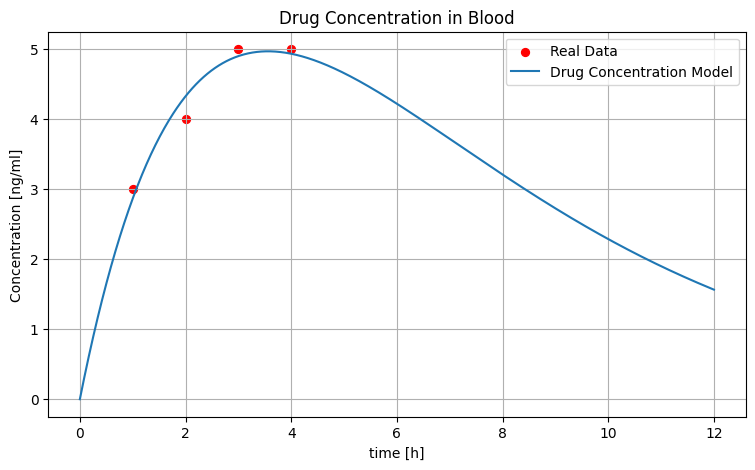

In [136]:
t = np.linspace(0, 12, num=1000)
y = []

# Obtaining data
for i in t:
    value = float(np.exp(float(LSNorEq(A, b)[2][0])) * i * np.exp(float(LSNorEq(A, b)[2][1]) * i))
    y.append(value)

# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(t, y)
plt.title('Drug Concentration in Blood')
plt.legend(["Real Data","Drug Concentration Model"])
plt.xlabel('time [h]')
plt.ylabel('Concentration [ng/ml]')
plt.grid()
plt.show()

### (b)
|t|y|
|:--:|:--:|
|1|2|
|2|4|
|3|3|
|4|2|

In [137]:
data = [(1, 2), (2, 4), (3, 3), (4, 2)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

### Solution

In [138]:
# Linearization
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1)) ,axis=1)
b = ((np.log(y0) - np.log(x0)).reshape(len(x0),1)).reshape(len(y0),1)

print(f"A = \n{A}")
print(f"\nb = \n{b}")

A = 
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]

b = 
[[ 0.69314718]
 [ 0.69314718]
 [ 0.        ]
 [-0.69314718]]


In [139]:
LSNorEq(A, b, True)


AᵀA =
 [[ 4. 10.]
 [10. 30.]]

Aᵀb =
 [[ 0.69314718]
 [-0.69314718]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[ 1.386294]
 [-0.485203]]

r =
[[-0.208]
 [ 0.277]
 [ 0.069]
 [-0.139]]

║r║₂ = 0.38

RMSE = 0.189826


In [140]:
c1 = np.exp(float(LSNorEq(A, b)[2][0]))
c2 = float(LSNorEq(A, b)[2][1])
print(f"c₁ = {np.round(c1, 5)}")
print(f"c₂ = {np.round(c2, 5)}")

c₁ = 4.0
c₂ = -0.4852


In [141]:
# RMSE for the non-linear model
print(f"RMSE = {np.round(RMSE(x0, y0, c1, c2), 6)}")

RMSE = 0.565827


### <center>$y = 4 \cdot t \cdot e^{-0.4852 \cdot t}$</center>

### <center>$RMSE = 0.565827$</center>

### Plot

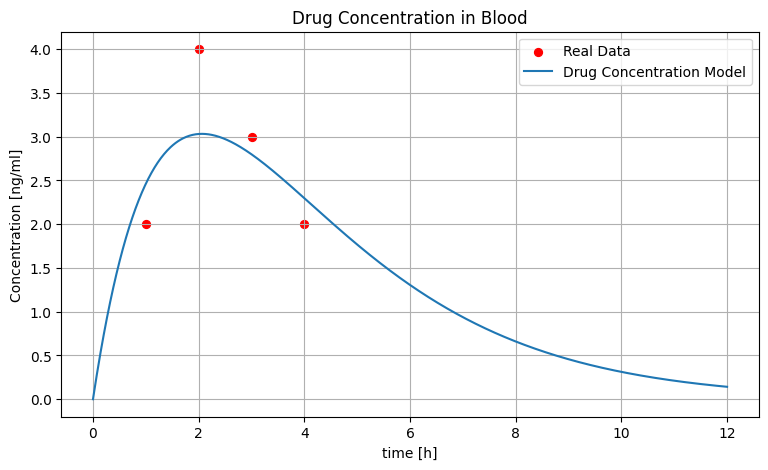

In [142]:
t = np.linspace(0, 12, num=1000)
y = []

# Obtaining data
for i in t:
    value = float( np.exp(float(LSNorEq(A, b)[2][0])) * i * np.exp(float(LSNorEq(A, b)[2][1]) * i) )
    y.append(value)

# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(t, y)
plt.title('Drug Concentration in Blood')
plt.legend(["Real Data","Drug Concentration Model"])
plt.xlabel('time [h]')
plt.ylabel('Concentration [ng/ml]')
plt.grid()
plt.show()

## Computer problem 3
Consider the world population data of Computer Problem 3.1.1. Find the best exponential fit of the data points by using linearization. Estimate the 1980 population, and find the estimation error.

The exponential model

\begin{align*} y = c_1 e^{c_2 t} \end{align*}

The model is linearized by applying the natural logarithm:

\begin{align*} \ln{y} = \ln{c_1 e^{c_2 t}} = k + c_2 t ,
\end{align*}


where $k = \ln(c_1)$.<p>
This leads to the matrix equation $Ax = b$, where

\begin{align*}
A = \begin{bmatrix} 1 & t_1 \\ \vdots & \vdots \\ 1 & t_m \end{bmatrix} \text{  and  } b = \begin{bmatrix} \ln{y_1} \\ \vdots \\ \ln{y_m} \end{bmatrix} 
\end{align*}.

The normal equations are solved for $k$ and $c_2$, and $c_1 = e^k$ .

|year|population|
|:--:|:--:|
|1960|3039585530|
|1970|3707475887|
|1990|5281653820|
|2000|6079603571|

In [143]:
data = [(1960, 3039585530), (1970, 3707475887), (1990, 5281653820), (2000, 6079603571)]
x0 = []
y0 = []
for row in data:
    x0.append(row[0])
    y0.append(row[1])
    
x0 = np.array(x0, dtype = np.float64)
y0 = np.array(y0, dtype = np.float64)

### Solution

In [144]:
# Linearization
A = np.concatenate((np.ones(len(x0)).reshape(len(x0),1), x0.reshape(len(x0),1)) ,axis=1)
b = ((np.log(y0)).reshape(len(x0),1)).reshape(len(y0),1)

print(f"A = \n{A}")
print(f"\nb = \n{b}")

A = 
[[1.00e+00 1.96e+03]
 [1.00e+00 1.97e+03]
 [1.00e+00 1.99e+03]
 [1.00e+00 2.00e+03]]

b = 
[[21.834987  ]
 [22.03361713]
 [22.38750511]
 [22.52820533]]


In [145]:
LSNorEq(A, b, True)


AᵀA =
 [[4.00000e+00 7.92000e+03]
 [7.92000e+03 1.56826e+07]]

Aᵀb =
 [[8.87843146e+01]
 [1.75810346e+05]]

The Normal Quations:
AᵀA x̄ = Aᵀb

x̄ =
 [[-12.262349]
 [  0.017403]]

r =
[[-0.013]
 [ 0.012]
 [ 0.017]
 [-0.016]]

║r║₂ = 0.029

RMSE = 0.014664


In [146]:
c1 = np.exp(float(LSNorEq(A, b)[2][0]))
c2 = float(LSNorEq(A, b)[2][1])
print(f"c₁ = {np.round(c1, 8)}")
print(f"c₂ = {np.round(c2, 6)}")

c₁ = 4.73e-06
c₂ = 0.017403


### <center>$y = 4.73 \cdot 10^{-6} \cdot e^{0.017403 \cdot t}$</center>

### Estimation of The 1980 Population

In [147]:
print(f"{np.rint( float( np.exp(float(LSNorEq(A, b)[2][0])) * np.exp(float(LSNorEq(A, b)[2][1]) * 1980))):,}")

4,361,485,915.0


### The Estimation Error

In [148]:
# RMSE for the non-linear model
print(f"RMSE = {np.rint(RMSE(x0, y0, c1, c2)):,}")

RMSE = 9,321,116,776,552.0


### Plot

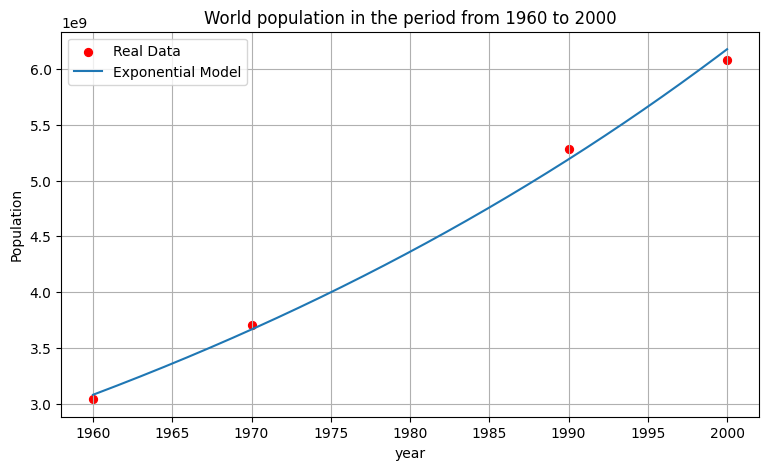

In [149]:
t = np.linspace(1960, 2000, num=1000)
y = []

# Obtaining data
for i in t:
    value = float(np.exp(float(LSNorEq(A, b)[2][0])) * np.exp(float(LSNorEq(A, b)[2][1]) * i))
    y.append(value)

# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x0, y0, s=32, c='r')
plt.plot(t, y)
plt.title('World population in the period from 1960 to 2000')
plt.legend(["Real Data","Exponential Model"])
plt.xlabel('year')
plt.ylabel('Population')
plt.grid()
plt.show()

# 4.3 QR Factorization

## Exercise 2
Apply classical Gram–Schmidt orthogonalization to find the full QR factorization of the following matrices:

In [150]:
def QR(A, full = False):
    '''
        The Reduced/Full QR Factorization with Classical Gram-Schmidt Orthogonalization
        - Input: mxn matrix A with linearly independent columns
        - Output: orthogonal matrix Q, upper triangular R
    '''
    
    # The number of rows must be equal to or greater than the number of columns of matrix A
    # c ≤ r
    if not (A.shape[1] <= A.shape[0]):
        print("Cannot perform QR factorization because matrix A has more columns than rows.")
        return None
    
    # Dimensions of A
    m = A.shape[0]
    n = A.shape[1]
    
    
    if full == True:
        # The matrix a is expanded by basis vectors (1, 0, 0 , ...), (0, 1, 0, 0, ...), ... 
        A = np.concatenate((A, np.identity(m)[:, 0:(m-n)]),axis=1)
        R = np.zeros((m, n))
        maxIterations = m
    else:
        R = np.zeros((n, n))
        maxIterations = n
        
    # Declaration of matrices Q 
    Q = np.array([])
    
    # Classical Gram-Schmidt orthogonalization
    for j in range(maxIterations):

        y = A[:, [j]]
        for i, q in enumerate(Q.T):
            q = q.reshape(len(q),1)
            
            # Σ qᵢ (qᵢᵀ A)
            r = q.T @ A[:, [j]]
            
            # yᵥ = Aᵥ - Σ qᵢ (qᵢᵀ Aᵥ)
            y -= q @ r
            
            if i < n and j < n:
                # rᵢᵣ = qᵢᵀ Aᵣ
                R[i, j] = r
        
        
        # rᵢᵢ = ║yᵢ║₂
        r = np.linalg.norm(y, 2)
        
        if j < n:
            R[j, j] = r
        
        # qᵥ = yᵥ / ║yᵥ║₂
        q = y / r
            
        if j == 0:
            Q = q
        else:
            Q = np.append(Q, q, axis=1)

    # print(f"Q = \n{Q}")
    # print(f"\nR = \n{R}")
    return Q, R

### (a)
#####  $\begin{bmatrix} 2 & 3\\ -2 & -6\\ 1 & 0 \end{bmatrix}$

In [151]:
# Declaration of A
A = np.array([[2, 3],[-2, -6],[1, 0]], dtype=float)
print(f"A =\n {A}")

A =
 [[ 2.  3.]
 [-2. -6.]
 [ 1.  0.]]


### Solution

In [152]:
Q, R = QR(A, True)

print(f"Q = \n{Q}")
print(f"\nR = \n{R}")

Q = 
[[ 0.66666667 -0.33333333  0.66666667]
 [-0.66666667 -0.66666667  0.33333333]
 [ 0.33333333 -0.66666667 -0.66666667]]

R = 
[[3. 6.]
 [0. 3.]
 [0. 0.]]


### (b
#####  $\begin{bmatrix} -4 & -4\\ -2 & 7\\ 4 & -5 \end{bmatrix}$

In [153]:
# Declaration of A
A = np.array([[-4, -4],[-2, 7],[4, -5]], dtype=float)
print(f"A =\n {A}")

A =
 [[-4. -4.]
 [-2.  7.]
 [ 4. -5.]]


### Solution

In [154]:
Q, R = QR(A, True)

print(f"Q = \n{np.round(Q, 5)}")
print(f"\nR = \n{np.round(R, 5)}")

Q = 
[[-0.66667 -0.66667  0.33333]
 [-0.33333  0.66667  0.66667]
 [ 0.66667 -0.33333  0.66667]]

R = 
[[ 6. -3.]
 [ 0.  9.]
 [ 0.  0.]]


## Exercise 7
Use the QR factorization from Exercise 2, 4, or 6 to solve the least squares problem.

### (a)
#####  $\begin{bmatrix} 2 & 3\\ -2 & -6\\ 1 & 0 \end{bmatrix} \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} 3\\ -3\\ 6 \end{bmatrix}$

In [155]:
# Declaration of A and b
A = np.array([[2, 3],[-2, -6],[1, 0]], dtype=float)
b = np.array([[3], [-3], [6]], dtype=float)
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[ 2.  3.]
 [-2. -6.]
 [ 1.  0.]]

b =
 [[ 3.]
 [-3.]
 [ 6.]]


### Solution

In [156]:
Q, R = QR(A, True)
d = Q.T @ b

# upper n × n submatrix of R
RHat = R[:R.shape[1],:R.shape[1]]

# upper n entries of d = Qᵀ b
dHat = d[:R.shape[1],:]

# Rˆ x̄ = dˆ for least squares solution x̄
xBar = LSNorEq(RHat, dHat)[2]

print(f"Q = \n{np.round(Q, 5)}")
print(f"\nR = \n{np.round(R, 5)}")
print(f"\nR^ = \n{np.round(RHat, 5)}")
print(f"\nd^ = \n{np.round(dHat, 5)}")
print(f"\nx̄ = \n{np.round(xBar, 5)}")

Q = 
[[ 0.66667 -0.33333  0.66667]
 [-0.66667 -0.66667  0.33333]
 [ 0.33333 -0.66667 -0.66667]]

R = 
[[3. 6.]
 [0. 3.]
 [0. 0.]]

R^ = 
[[3. 6.]
 [0. 3.]]

d^ = 
[[ 6.]
 [-3.]]

x̄ = 
[[ 4.]
 [-1.]]


### (b)
#####  $\begin{bmatrix} -4 & -4\\ -2 & 7\\ 4 & -5 \end{bmatrix} \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} 3\\ 9\\ 0 \end{bmatrix}$

In [157]:
# Declaration of A and b
A = np.array([[-4, -4],[-2, 7],[4, -5]], dtype=float)
b = np.array([[3], [9], [0]], dtype=float)
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[-4. -4.]
 [-2.  7.]
 [ 4. -5.]]

b =
 [[3.]
 [9.]
 [0.]]


### Solution

In [158]:
Q, R = QR(A, True)
d = Q.T @ b

# upper n × n submatrix of R
RHat = R[:R.shape[1],:R.shape[1]]

# upper n entries of d = Qᵀ b
dHat = d[:R.shape[1],:]

# Rˆ x̄ = dˆ for least squares solution x̄
xBar = LSNorEq(RHat, dHat)[2]

print(f"Q = \n{np.round(Q, 5)}")
print(f"\nR = \n{np.round(R, 5)}")
print(f"\nR^ = \n{np.round(RHat, 5)}")
print(f"\nd^ = \n{np.round(dHat, 5)}")
print(f"\nx̄ = \n{np.round(xBar, 5)}")

Q = 
[[-0.66667 -0.66667  0.33333]
 [-0.33333  0.66667  0.66667]
 [ 0.66667 -0.33333  0.66667]]

R = 
[[ 6. -3.]
 [ 0.  9.]
 [ 0.  0.]]

R^ = 
[[ 6. -3.]
 [ 0.  9.]]

d^ = 
[[-5.]
 [ 4.]]

x̄ = 
[[-0.61111]
 [ 0.44444]]


## Computer problem 1
Write a program that implements the modified Gram–Schmidt method to find the reduced QR factorization. Only one line from the classical version needs to be changed. Check your work by comparing factorizations of the matrices in Exercise 1 with one of the QR solvers. The factorization is unique up to signs of the entries of Q and R.

In [159]:
def QRModified(A, full = False):
    '''
        The Reduced/Full QR Factorization with Modified Gram-Schmidt Orthogonalization
        - Input: mxn matrix A with linearly independent columns
        - Output: orthogonal matrix Q, upper triangular R
    '''
    
    # The number of rows must be equal to or greater than the number of columns of matrix A
    # c ≤ r
    if not (A.shape[1] <= A.shape[0]):
        print("Cannot perform QR factorization because matrix A has more columns than rows.")
        return None
    
    # Dimensions of A
    m = A.shape[0]
    n = A.shape[1]
    
    
    if full == True:
        # The matrix a is expanded by basis vectors (1, 0, 0 , ...), (0, 1, 0, 0, ...), ... 
        A = np.concatenate((A, np.identity(m)[:, 0:(m-n)]),axis=1)
        R = np.zeros((m, n))
        maxIterations = m
    else:
        R = np.zeros((n, n))
        maxIterations = n
        
    # Declaration of matrices Q 
    Q = np.array([])
    
    # Modified Gram-Schmidt orthogonalization
    for j in range(maxIterations):

        y = A[:, [j]]
        for i, q in enumerate(Q.T):
            q = q.reshape(len(q),1)
            
            # Σ qᵢ (qᵢᵀ y)
            r = q.T @ y
            
            # yᵥ = Aᵥ - Σ qᵢ (qᵢᵀ Aᵥ)
            y -= q @ r
            
            if i < n and j < n:
                # rᵢᵣ = qᵢᵀ Aᵣ
                R[i, j] = r
        
        
        # rᵢᵢ = ║yᵢ║₂
        r = np.linalg.norm(y, 2)
        
        if j < n:
            R[j, j] = r
        
        # qᵥ = yᵥ / ║yᵥ║₂
        q = y / r
            
        if j == 0:
            Q = q
        else:
            Q = np.append(Q, q, axis=1)

    # print(f"Q = \n{Q}")
    # print(f"\nR = \n{R}")
    return Q, R

In [160]:
A = np.array([[1, 1],[2, 1],[1, 2],[0, 3]], dtype=float)
print(f"A =\n {A}")

A =
 [[1. 1.]
 [2. 1.]
 [1. 2.]
 [0. 3.]]


In [161]:
Q, R = QRModified(A)

print(f"Q = \n{Q}")
print(f"\nR = \n{R}")

Q = 
[[ 0.40824829  0.05063697]
 [ 0.81649658 -0.20254787]
 [ 0.40824829  0.35445878]
 [ 0.          0.91146543]]

R = 
[[2.44948974 2.04124145]
 [0.         3.29140294]]


In [162]:
# Test
print(f"Q * R = \n{Q @ R}")

Q * R = 
[[1. 1.]
 [2. 1.]
 [1. 2.]
 [0. 3.]]


In [163]:
Q, R = np.linalg.qr(A, mode='reduced')

print(f"Q = \n{Q}")
print(f"\nR = \n{R}")

Q = 
[[-0.40824829  0.05063697]
 [-0.81649658 -0.20254787]
 [-0.40824829  0.35445878]
 [-0.          0.91146543]]

R = 
[[-2.44948974 -2.04124145]
 [ 0.          3.29140294]]


In [164]:
# Test
print(f"Q * R = \n{Q @ R}")

Q * R = 
[[1. 1.]
 [2. 1.]
 [1. 2.]
 [0. 3.]]


#### The custom implementation of QR factorization and QR factorization from the numpy library have 8 common digits after the decimal point. Some elements have a different sign, which is due to a different implementation of QR factorization. This is not a mistake because the test proved the correctness of both solutions.

## Computer problem 5
Use the Numpy QR factorization to find the least squares solutions and 2-norm error of the following inconsistent systems:

### (a)
#####  $\begin{bmatrix} 1 & 1\\ 2 & 1\\ 1 & 2 \\ 0 & 3 \end{bmatrix} \begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} 3\\ 5\\ 5 \\ 5 \end{bmatrix}$

In [165]:
# Declaration of A and b
A = np.array([[1, 1],[2, 1],[1, 2],[0, 3]], dtype=float)
b = np.array([[3], [5], [5], [5]], dtype=float)
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[1. 1.]
 [2. 1.]
 [1. 2.]
 [0. 3.]]

b =
 [[3.]
 [5.]
 [5.]
 [5.]]


### Solution

In [166]:
Q, R = np.linalg.qr(A, mode='complete')
d = Q.T @ b

# upper n × n submatrix of R
RHat = R[:R.shape[1],:R.shape[1]]

# upper n entries of d = Qᵀ b
dHat = d[:R.shape[1],:]

# Rˆ x̄ = dˆ for least squares solution x̄
xBar = np.linalg.lstsq(RHat, dHat, rcond=-1)[0]

# Residuum r = b - A * x̄
r = b - A @ xBar

# 2-Norm Error ║r║₂
twoNormError = np.linalg.norm(r, 2)

print(f"Q = \n{np.round(Q, 5)}")
print(f"\nR = \n{np.round(R, 5)}")
print(f"\nR^ = \n{np.round(RHat, 5)}")
print(f"\nd^ = \n{np.round(dHat, 5)}")
print("\nThe Normal Quations:")
print(f"Rˆ x̄ = dˆ")
print(f"\nx̄ = \n{np.round(xBar, 5)}")
print(f"\n║e║₂ = {np.round(twoNormError, 5)}")

Q = 
[[-0.40825  0.05064 -0.64742 -0.64158]
 [-0.8165  -0.20255 -0.03559  0.53948]
 [-0.40825  0.35446  0.7186  -0.43739]
 [-0.       0.91147 -0.2514   0.32562]]

R = 
[[-2.44949 -2.04124]
 [ 0.       3.2914 ]
 [ 0.       0.     ]
 [ 0.       0.     ]]

R^ = 
[[-2.44949 -2.04124]
 [ 0.       3.2914 ]]

d^ = 
[[-7.34847]
 [ 5.46879]]

The Normal Quations:
Rˆ x̄ = dˆ

x̄ = 
[[1.61538]
 [1.66154]]

║e║₂ = 0.30382


### (b)
#####  $\begin{bmatrix} 1 & 2 & 2\\ 2 & -1 & 2\\ 3 & 1 & 1\\ 1 & 1 & -1 \end{bmatrix} \begin{bmatrix} x_1\\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 10\\ 5\\ 10 \\ 3 \end{bmatrix}$

In [183]:
# Declaration of A and b
A = np.array([[1, 2, 2],[2, -1, 2],[3, 1, 1],[1, 1, -1]])
b = np.array([[10], [5], [10], [3]])
print(f"A =\n {A}")
print(f"\nb =\n {b}")

A =
 [[ 1  2  2]
 [ 2 -1  2]
 [ 3  1  1]
 [ 1  1 -1]]

b =
 [[10]
 [ 5]
 [10]
 [ 3]]


### Solution

In [184]:
Q, R = np.linalg.qr(A, mode='complete')
d = Q.T @ b

# upper n × n submatrix of R
RHat = R[:R.shape[1],:R.shape[1]]

# upper n entries of d = Qᵀ b
dHat = d[:R.shape[1],:]

# Rˆ x̄ = dˆ for least squares solution x̄
xBar = np.linalg.lstsq(RHat, dHat, rcond=-1)[0]

# Residuum r = b - A * x̄
r = b - A @ xBar

# 2-Norm Error ║r║₂
twoNormError = np.linalg.norm(r, 2)

print(f"Q = \n{np.round(Q, 5)}")
print(f"\nR = \n{np.round(R, 5)}")
print(f"\nR^ = \n{np.round(RHat, 5)}")
print(f"\nd^ = \n{np.round(dHat, 5)}")
print("\nThe Normal Quations:")
print(f"Rˆ x̄ = dˆ")
print(f"\nx̄ = \n{np.round(xBar, 5)}")
print(f"\n║e║₂ = {np.round(twoNormError, 5)}")

Q = 
[[-0.2582   0.71159  0.62896  0.17712]
 [-0.5164  -0.62949  0.3755   0.44281]
 [-0.7746   0.08211 -0.24877 -0.57565]
 [-0.2582   0.30106 -0.63366  0.66421]]

R = 
[[-3.87298 -1.0328  -2.06559]
 [ 0.       2.43584 -0.05474]
 [ 0.       0.       2.39381]
 [ 0.       0.       0.     ]]

R^ = 
[[-3.87298 -1.0328  -2.06559]
 [ 0.       2.43584 -0.05474]
 [ 0.       0.       2.39381]]

d^ = 
[[-13.68454]
 [  5.69276]
 [  3.77847]]

The Normal Quations:
Rˆ x̄ = dˆ

x̄ = 
[[2.05882]
 [2.37255]
 [1.57843]]

║e║₂ = 0.2214


# Exercises Not from the Textbook

## Task # 1
Let's generate our data in the following way: Start by sampling the cubic polynomial

#### <center>$q(t) = -11 + \frac{55}{3}t - \frac{17}{2}t^2 + \frac{7}{6}t^3$</center>

at $33$ equidistant points $x$ between $0.9$ and $4.1$. Then add to these values $30\%$ noise using random number generator rand. After that, we "forget" that the data came from $q$, and we work only with the data points.<p>

Program the following $3$ approximations. In each case, plot the data and the obtained approximations. Which approximation makes more sense? Discuss.

In [169]:
def qubicPolynomial(t):
    return -11 + 55/3 * t - 17/2 * t**2 + 7/6 * t**3

In [170]:
# The generator will always work with the same random numbers
np.random.seed(1)

# 33 equidistant points x between 0.9 and 4.1
x = np.linspace(0.9, 4.1, 33)

# Sampling data from the cubic pol. with 30% of noise
dataPoins = qubicPolynomial(x) + 0.3 * np.random.rand(len(x))

### (a)
An interpolating polynomial of degree $32$. (You don't need to know how interpolation works).

In [171]:
# Input t for plotting approximation data curves
t = np.linspace(0.9, 4.1, 1000)

In [172]:
# Fitting
coef32 = np.polyfit(x, dataPoins, 32)
p32 = np.poly1d(coef32)

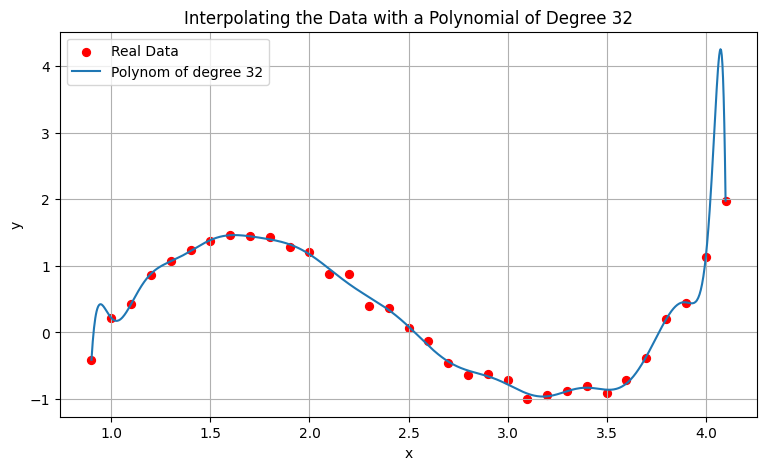

In [173]:
# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x, dataPoins, s=32, c='r')
plt.plot(t, p32(t))
plt.title('Interpolating the Data with a Polynomial of Degree 32')
plt.legend(["Real Data","Polynom of degree 32"])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### RMSE

In [174]:
# 2-Norm Error ║e║₂
twoNormError = np.linalg.norm(dataPoins - p32(x), 2)
    
# RMSE
rmse = twoNormError / np.sqrt(len(x))

print(f"RMSE = {np.round(rmse, 8)}")

RMSE = 0.04990707


### (b)
An interpolating cubic spline. (Again, you don't need to know how splines work for this exercise).

In [175]:
# Fitting
cs = CubicSpline(x, dataPoins)

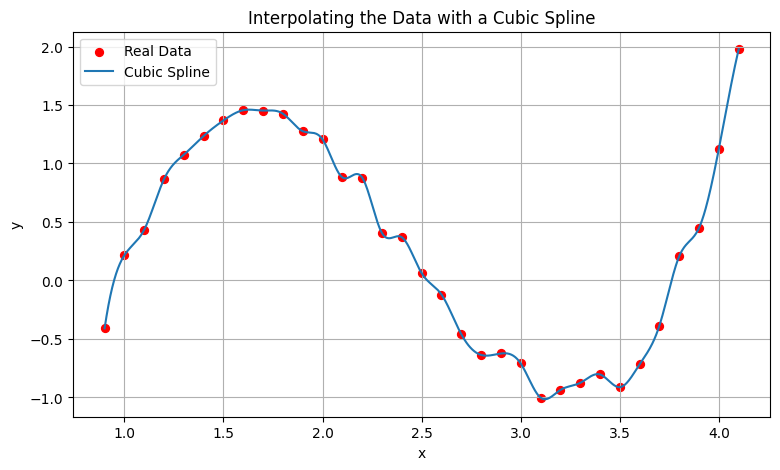

In [176]:
# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x, dataPoins, s=32, c='r')
plt.plot(t, cs(t))
plt.title('Interpolating the Data with a Cubic Spline')
plt.legend(["Real Data","Cubic Spline"])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### RMSE

In [177]:
# 2-Norm Error ║e║₂
twoNormError = np.linalg.norm(dataPoins - cs(x), 2)
    
# RMSE
rmse = twoNormError / np.sqrt(len(x))

print(f"RMSE = {np.round(rmse, 16)}")

RMSE = 0.0


### (c)
A cubic polynomial which best fits the data in the $l_2$ sense, obtained by your own least squares function.

In [178]:
# Creation of matrix A and vector b
A = np.concatenate((np.ones(len(x)).reshape(len(x),1), x.reshape(len(x),1) , x.reshape(len(x),1)**2, x.reshape(len(x),1)**3 ),axis=1)
b = dataPoins.reshape(len(dataPoins),1)

# print(f"A = \n{A}")
# print(f"\nb = \n{b}")

In [179]:
# Finding the coefficient of a polynomial of the third order using the method of least squares
xBarCub = LSNorEq(A, b)[2]

In [180]:
# Obtaining data for a polynomial of the 3rd order
y = []
for i in range(len(t)):
    value = float(np.dot(np.array([[1, t[i], t[i]**2, t[i]**3]]), xBarCub))
    y.append(value)

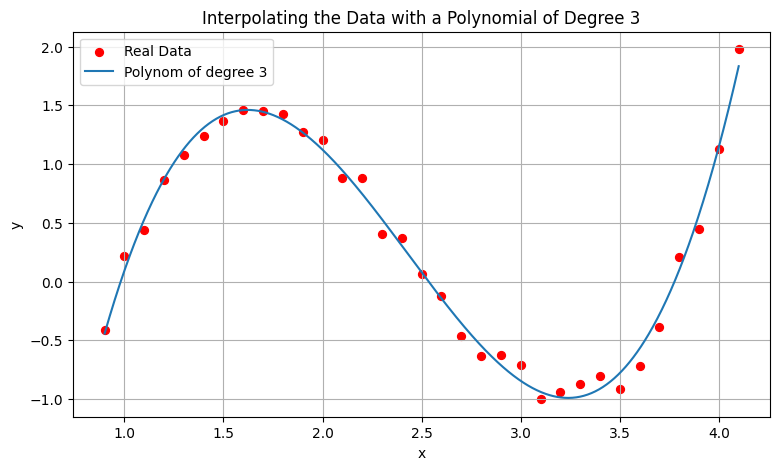

In [181]:
# Plot   
plt.figure(figsize = (9, 5))
plt.scatter(x, dataPoins, s=32, c='r')
plt.plot(t, y)
plt.title('Interpolating the Data with a Polynomial of Degree 3')
plt.legend(["Real Data","Polynom of degree 3"])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### RMSE

In [182]:
# 2-Norm Error ║e║₂
twoNormError = np.linalg.norm(dataPoins - A @ xBarCub, 2)
    
# RMSE
rmse = twoNormError / np.sqrt(len(x))

print(f"RMSE = {np.round(rmse, 8)}")

RMSE = 5.07350969


### The Cubic Spline approximation is the best in the sense of RMSE which is the smallest for this approximation compared to the other two approximations. On the other hand, the third-order polynomial approximation appears to be the worst because it has the largest RMSE of the given approximations.